<a href="https://colab.research.google.com/github/dars180602/CIFAR-10/blob/main/Assignment_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3104 - Neural Networks and Deep Learning 01**

**Diana Alejandra Reyes Serrano**

**C0889591**

**Assignment Title**: Image Classification using Convolutional Neural Networks (CNNs)

**Assignment Description**: In this assignment, you will implement a Convolutional Neural Network (CNN) model to classify images into multiple categories. You will use a dataset of your choice to train and evaluate your model. The assignment will involve data preprocessing, model building, training, evaluation, and interpretation of results.



In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt



**Data Preprocessing:**

Download and preprocess the chosen dataset. Perform tasks such as resizing images, normalization, and splitting into training and testing sets.

In [14]:
# Download the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# encode the labels (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the dataset into training and testing
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('Training set size:', x_train.shape[0])
print('Size of validation set:', x_val.shape[0])
print('Size of test set:', x_test.shape[0])


Training set size: 40000
Size of validation set: 10000
Size of test set: 10000


**Model Building:**

Implement a CNN model using TensorFlow or Keras.
Design the architecture of the CNN model including convolutional layers, pooling layers, and fully connected layers.
Choose appropriate activation functions, dropout rates, and regularization techniques.

In [8]:
# Create the CNN model
model = Sequential()

# Convolution layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolution layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolution layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

#  Fully connected layer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

**Training the Model:**

Train your CNN model on the training dataset.
Experiment with different hyperparameters such as learning rate, batch size, and number of epochs.
Monitor the training process and visualize training/validation loss and accuracy.

Epoch 1/20
625/625 [==============================] - 59s 92ms/step - loss: 1.8167 - accuracy: 0.3451 - val_loss: 1.4654 - val_accuracy: 0.4695
Epoch 2/20
625/625 [==============================] - 54s 86ms/step - loss: 1.4326 - accuracy: 0.5012 - val_loss: 1.2615 - val_accuracy: 0.5572
Epoch 3/20
625/625 [==============================] - 52s 82ms/step - loss: 1.2727 - accuracy: 0.5683 - val_loss: 1.1511 - val_accuracy: 0.6128
Epoch 4/20
625/625 [==============================] - 51s 82ms/step - loss: 1.1673 - accuracy: 0.6073 - val_loss: 1.0970 - val_accuracy: 0.6338
Epoch 5/20
625/625 [==============================] - 50s 80ms/step - loss: 1.0886 - accuracy: 0.6411 - val_loss: 1.0228 - val_accuracy: 0.6601
Epoch 6/20
625/625 [==============================] - 71s 114ms/step - loss: 1.0278 - accuracy: 0.6671 - val_loss: 0.9982 - val_accuracy: 0.6697
Epoch 7/20
625/625 [==============================] - 68s 109ms/step - loss: 0.9733 - accuracy: 0.6834 - val_loss: 0.9355 - val_accurac

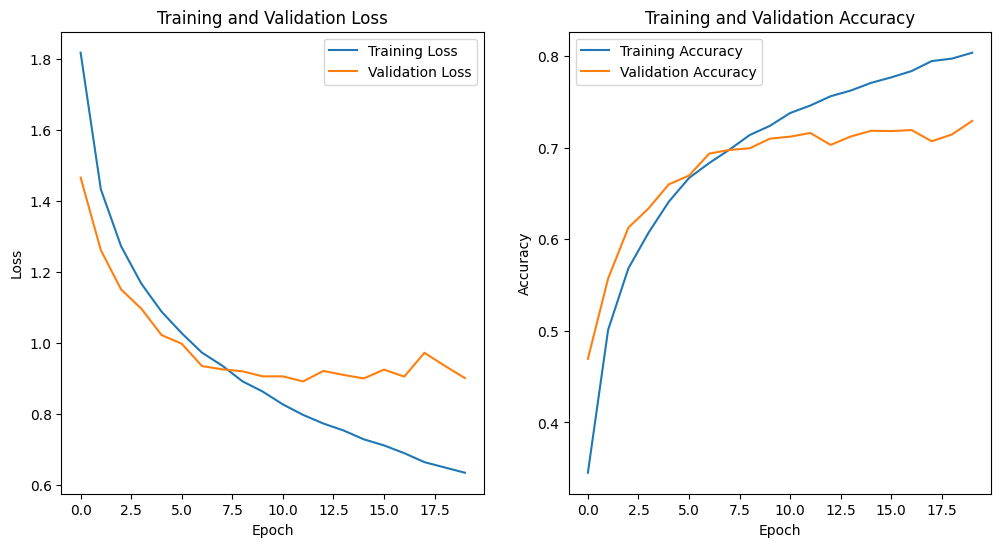

In [9]:
#  Define hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 20

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

# Visualizing loss and accuracy during training
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Evaluation:**

Evaluate the performance of your trained model on the test dataset.
Calculate evaluation metrics such as accuracy, precision, recall, and F1-score.
Visualize the confusion matrix to understand the model's performance across different classes.

313/313 [==============================] - 5s 15ms/step
Accuracy: 0.7314
Precision: 0.7311376662704357
Recall: 0.7314
F1-score: 0.7298963425910838


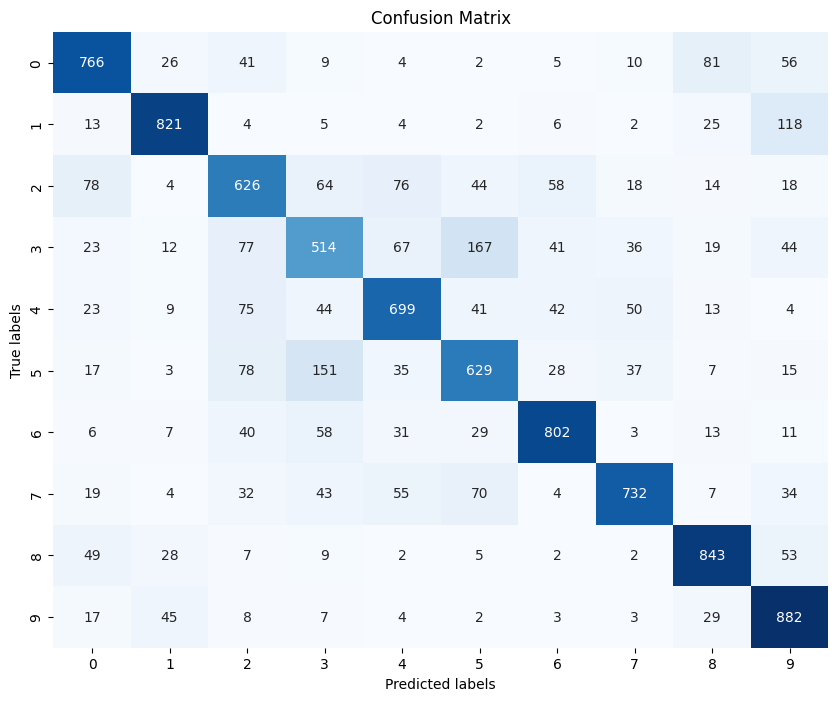

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predictions in the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Display the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Results Interpretation:**

Analyze the results of your CNN model.
Interpret the performance metrics and discuss any challenges encountered during the training and evaluation process.
Explore misclassified images and identify potential reasons for misclassifications.

Precision:

Precision indicates the proportion of positive predictions that were correct. In this case, the precision of approximately 0.731 suggests that about 73.1% of the instances classified as positive were classified correctly.
Recall:

Recall indicates the proportion of positive instances that were correctly classified as positive. Here, a recall value of about 0.73 indicates that the model correctly identified about 73% of all positive instances.
F1-score (F1-score):

The F1-score is a measure of model accuracy that considers both precision and recall. It is the harmonic mean of precision and recall. An F1-score value of approximately 0.7299 suggests a balance between precision and recall.
Overall Accuracy:

The overall accuracy indicates the total proportion of correct predictions of the model. Here, an accuracy of about 0.73 means that the model correctly classified about 73% of all instances.


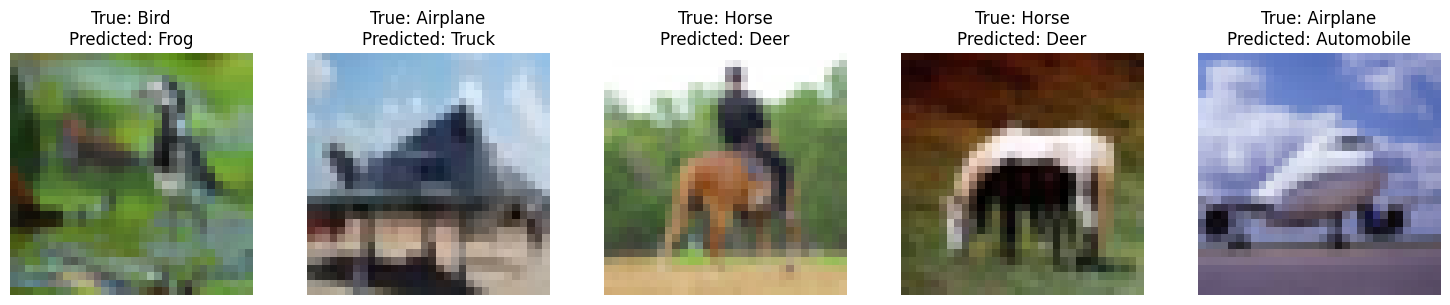

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the names of the classes
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display misclassified images
def visualize_misclassified_images(x_data, y_true, y_pred, class_names, num_images=5):
    misclassified_indices = np.where(y_true != y_pred)[0]
    num_images = min(num_images, len(misclassified_indices))

    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for i, idx in enumerate(np.random.choice(misclassified_indices, num_images, replace=False)):
        ax = axes[i]
        ax.imshow(x_data[idx])
        ax.set_title(f'True: {class_names[y_true[idx]]}\nPredicted: {class_names[y_pred[idx]]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Uses the function to display some misclassified images
visualize_misclassified_images(x_test, y_true, y_pred_classes, class_names, num_images=5)


Conclusions:

Model Performance:

The CNN model showed decent performance with an accuracy of about 73% on the test set.

The accuracy, recall and F1 score metrics indicate that the model is capable of making predictions with reasonable accuracy, but there is still room for improvement.

Challenges Identified:

Although the model showed decent performance, there are still challenges such as misclassification of certain images.

Exploration of misclassified images revealed potential areas for improvement, such as identifying ambiguous features or lack of variability in the data.

Model Limitations:

The model may be limited by the complexity of features present in the images, the amount and diversity of training data, as well as the model architecture and hyperparameters.
